# <center>Распознавание образов, описываемых бинарными признаками </center><a class="tocSkip">

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from models import PatternClassifier

# Постановка задачи

Рассмотрим модель распознавания бинарных изображений в условиях помех. Воздействие помех приводит к инвертированию писелов изображения, изменяя их значения на противоположные с одинаковой вероятностью $p_I > 0$.

Зададим изображения букв в виде матриц 7x5 (как в matlab скрипте <a href ='https://www.mathworks.com/help/nnet/examples/character-recognition.html'>prprob</a>).

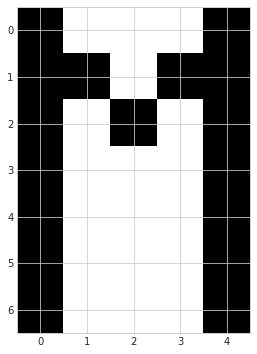

In [2]:
M = np.array([[1,0,0,0,1],
              [1,1,0,1,1],
              [1,0,1,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1]])
plt.imshow(1-M,cmap='gray');

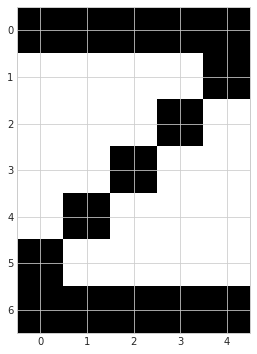

In [3]:
Z = np.array([[1,1,1,1,1],
               [0,0,0,0,1],
               [0,0,0,1,0],
               [0,0,1,0,0],
               [0,1,0,0,0],
               [1,0,0,0,0],
               [1,1,1,1,1]])
plt.imshow(1-Z,cmap='gray');

In [4]:
s = np.zeros([M.size,2])
s[:,0] = M.ravel()
s[:,1] = Z.ravel()

Массив s содержит элементы $s_k^{(i)}$ исходных неискаженных бинарных изображений $\omega_i$, развернутых в векторы-столбцы и принимающих значение 1 и 0 в зависимости закрашен ли ($s_k^{(i)} = 1$) соответствющий элемент изображения или нет($s_k^{(i)} = 0$). 
В некоторых элементах исходные изображения совпадают. Эти точки в дальнейшем исключаются из вычисления ЛОП.

# Решение


Проведем имитационное моделирование алгоритма, в ходе которого рассчитаем значения вероятности ошибок распознавания для трех различных случаев априорных вероятностей гипотез:
- $p(\omega_1) < p(\omega_2)$
- $p(\omega_1) = p(\omega_2)$
- $p(\omega_1) > p(\omega_2)$

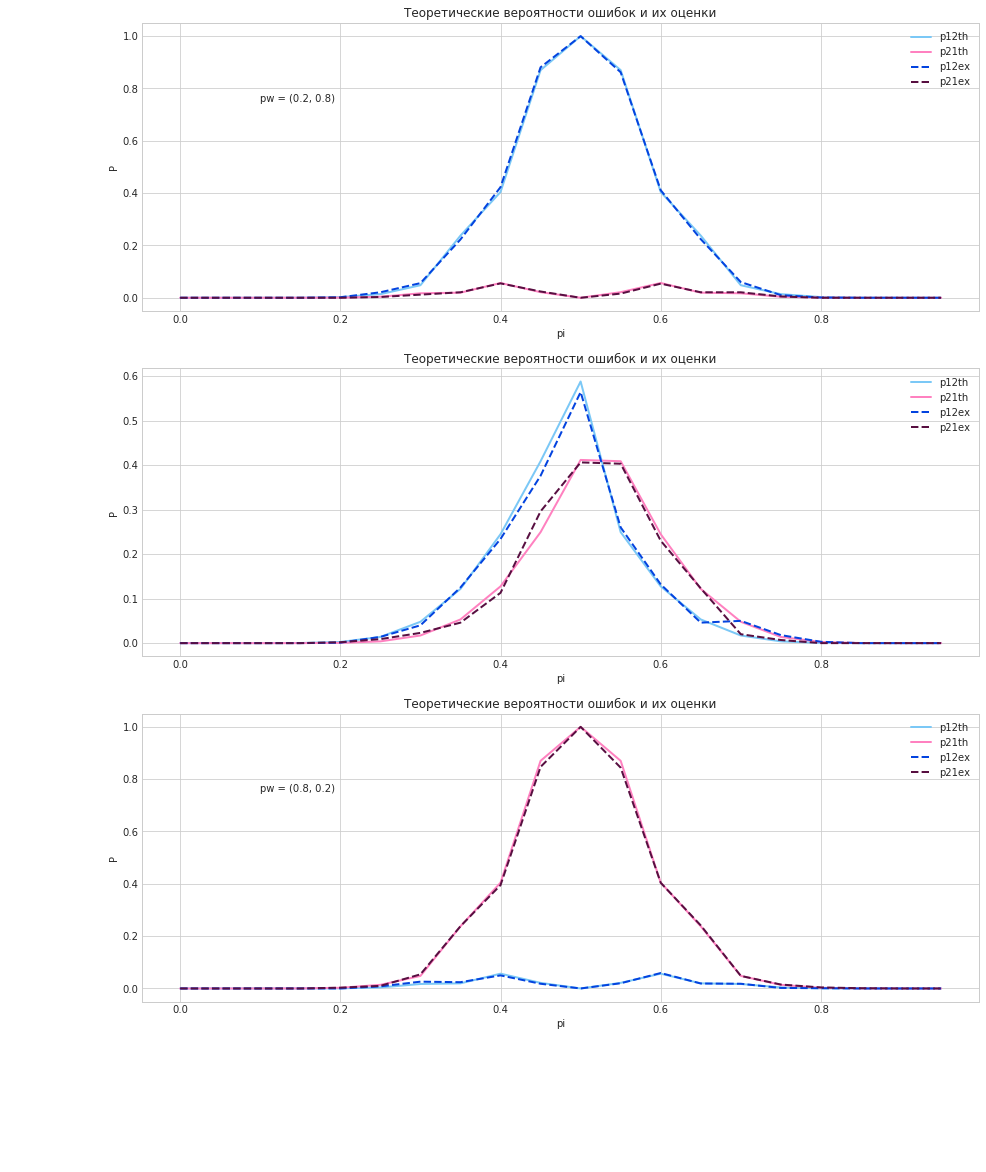

In [5]:
pws = [(0.2,0.8),(0.5,0.5),(0.8,0.2)]
f, axes = plt.subplots(3,1,figsize = (15,18))
for i,pw in enumerate(pws):
    pc = PatternClassifier(s,pw)
    pc.classify()
    pc.plot(310+i+1,axes[i])

На основе полученных зависимостей можно сделать следующие выводы:
- экспериментальные и теоретические результаты совпадают - алгоритм работает корректно
- зависимости имеют симметричный вид, что объясняется переинверсией
- в точке $p_I = 0.5$, когда логарифм отношения правдоподобия равен 0(т.е. мы не сможем отнести образ к тому или иному классу, используя решающее правило), решение принимается в пользу класса с наибольшей априорной вероятностью

Код алгоритма доступен <a href = "https://gist.github.com/mzaharchenko/1d77685a4b42f6e78dd4b811e9c44594">тут</a>

Искаженные версии изображений:

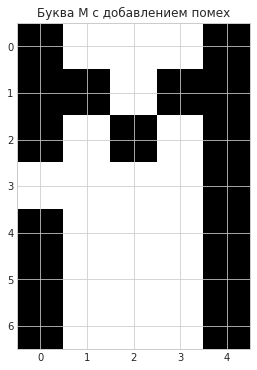

In [6]:
plt.imshow(pc.plots[0],cmap='gray')
plt.title('Буква М с добавлением помех');

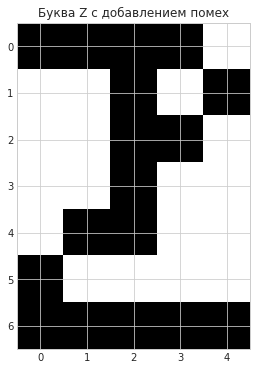

In [7]:
plt.imshow(pc.plots[1],cmap='gray')
plt.title('Буква Z с добавлением помех');